## Decision Tree

(array([ 229.,    0.,  951.,    0.,    0., 1622.,    0., 1170.,    0.,
        1026.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

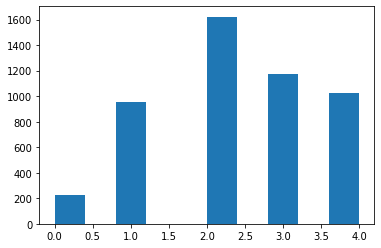

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("final_validated_data.csv")
data.head()



IT_df = data.drop(['Unnamed: 0', 'RowID', 'maxsal', 'minsal','industry', 'city', 'scale', 'name', 'uuid', 'c_desc', 'c_tag','c_name'],axis=1)


# #确定 X和 y

X = IT_df


# Label the max salary (4 classes)
label = []
# max_sal = data["maxsal"].to_numpy()
# for i in max_sal:

#     if i in range(0,150):
#         label.append(0)
#     elif i in range(150,175):
#         label.append(1)
#     elif i in range(175,250):
#         label.append(2)
#     else:
#         label.append(3)
# y = np.array(label)
# plt.hist(y)

for i in max_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,150):
        label.append(1)
    elif i in range(150,175):
        label.append(2)
    elif i in range(175,250):
        label.append(3)
    else:
        label.append(4)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [99]:
1026/len(y)

0.20528211284513806

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)


# X_train, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# model = DecisionTreeClassifier()


# from sklearn.model_selection import GridSearchCV


# parameters = {
#     'max_depth': [10,20,30,40,50],
#     'min_samples_leaf': [1,2,5,10,20]
# }

# grid_search = GridSearchCV(model, param_grid = parameters, scoring = 'neg_log_loss', cv=4, return_train_score = True)
# grid_search.fit(X_train_scaled, y_train)
# #print(grid_search.cv_results_)
# print(grid_search.best_params_)

# 查看accuracy 和 loss

In [47]:
from sklearn.metrics import accuracy_score, precision_score, log_loss

model = DecisionTreeClassifier(max_depth=35,min_samples_leaf=10)
model.fit(X_train_scaled,y_train)



train_acc = accuracy_score(model.predict(X_train_scaled),y_train)
test_acc = accuracy_score(model.predict(X_test_scaled),y_test)


# train_pre = precision_score(model.predict(X_train_scaled),y_train,average="micro")
# test_pre = precision_score(model.predict(X_test_scaled),y_test,average="micro")

train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))



print("=======Accuracy========\n\n")
print(train_acc)
print(test_acc)


print("=======Loss=========\n\n")

print(train_loss)
print(test_loss)


=======Accuracy========


0.5880440220110055
0.456
=======Loss=========


0.9352614372710598
3.848518544499605


[0.3741870935467734, 0.39344672336168085, 0.4004502251125563, 0.41745872936468237, 0.43721860930465234, 0.45372686343171587, 0.46898449224612304, 0.4927463731865933, 0.5087543771885943, 0.532016008004002, 0.5537768884442221, 0.568784392196098, 0.5877938969484743, 0.6045522761380691, 0.6213106553276638, 0.6303151575787894, 0.6400700350175088, 0.6470735367683842, 0.6533266633316658, 0.659079539769885, 0.6613306653326664, 0.6608304152076038, 0.6673336668334167, 0.6698349174587294, 0.6728364182091046, 0.6740870435217609, 0.6740870435217609, 0.6745872936468235, 0.6745872936468235, 0.6743371685842922, 0.6740870435217609, 0.6745872936468235, 0.6745872936468235, 0.6745872936468235, 0.6745872936468235, 0.6745872936468235, 0.6743371685842922, 0.6745872936468235, 0.6740870435217609]
[0.331, 0.354, 0.348, 0.359, 0.367, 0.375, 0.376, 0.39, 0.389, 0.398, 0.41, 0.417, 0.437, 0.451, 0.451, 0.448, 0.474, 0.471, 0.469, 0.468, 0.475, 0.477, 0.482, 0.486, 0.488, 0.485, 0.481, 0.479, 0.481, 0.483, 0.478, 0

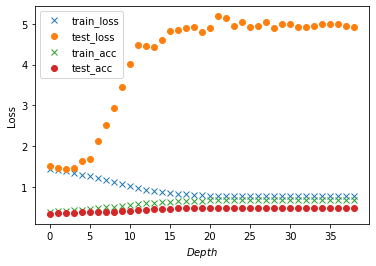

In [48]:
train_losses = []
test_losses = []

train_history = []
test_history = []

for depth in range(1,40):
    model = DecisionTreeClassifier(max_depth = depth, max_leaf_nodes = 400)
    model.fit(X_train_scaled,y_train)
    
    train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
    test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    train_acc = accuracy_score(model.predict(X_train_scaled),y_train)
    test_acc = accuracy_score(model.predict(X_test_scaled),y_test)
    
    train_history.append(train_acc)
    test_history.append(test_acc)
    
plt.plot(train_losses,'x',label="train_loss");
plt.plot(test_losses,'o',label="test_loss");

plt.plot(train_history,'x',label="train_acc");
plt.plot(test_history,'o',label="test_acc");

plt.xlabel('$Depth$'); plt.ylabel('Loss')
plt.legend();

print(train_history)
print(test_history)

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV


parameters = {
#     'n_estimators' : [x for x in range(36,60,2)],
    'max_leaf_nodes': [x for x in [300,400,500,1000]],
    'max_depth': [x for x in [20,30,40,50,60]],
#     'min_samples_split' : [2,3,5,10,20]
}

grid_search = GridSearchCV(rf, param_grid = parameters, scoring = 'neg_log_loss', cv=4, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
#print(grid_search.cv_results_)
print(grid_search.best_params_)

# {'max_depth': 40, 'max_leaf_nodes': 400, 'n_estimators': 9}

{'max_depth': 40, 'max_leaf_nodes': 500}


In [116]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=30, max_leaf_nodes = 400)
model.fit(X_train_scaled, y_train)

train_acc = accuracy_score(model.predict(X_train_scaled), y_train)
test_acc = accuracy_score(model.predict(X_test_scaled), y_test)

train_loss = log_loss(y_train, model.predict_proba(X_train_scaled))
test_loss = log_loss(y_test, model.predict_proba(X_test_scaled))
    

print("=======Accuracy========\n\n")
print(train_acc)
print(test_acc)

print("=======Loss=========\n\n")
print(train_loss)
print(test_loss)

=======Accuracy========


0.7836418209104552
0.469
=======Loss=========


0.8282904561046097
1.2220255145900838


[0.5460230115057528, 0.6133066533266633, 0.6605802901450726, 0.6833416708354177, 0.6803401700850426, 0.7053526763381691, 0.7301150575287644, 0.7161080540270135, 0.7288644322161081, 0.7386193096548274, 0.7426213106553277, 0.7521260630315157, 0.7503751875937968, 0.7426213106553277, 0.7573786893446723, 0.7668834417208604, 0.76088044022011, 0.7633816908454227, 0.7576288144072036, 0.7733866933466733, 0.772136068034017, 0.7636318159079539, 0.7681340670335167, 0.7671335667833917, 0.7676338169084542, 0.7698849424712356, 0.7713856928464232, 0.7738869434717359, 0.7731365682841421, 0.7766383191595798, 0.7751375687843922, 0.772136068034017, 0.7718859429714857, 0.7763881940970485, 0.7896448224112056, 0.7788894447223612, 0.7793896948474237, 0.776888444222111, 0.783391695847924, 0.7751375687843922, 0.7783891945972986, 0.7831415707853927, 0.7793896948474237, 0.7813906953476738, 0.7803901950975488, 0.7783891945972986, 0.7818909454727364, 0.7923961980990495, 0.7836418209104552]
[0.4, 0.419, 0.414, 0.426

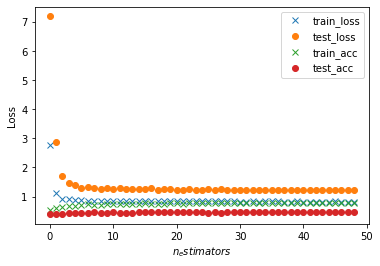

In [59]:
train_losses = []
test_losses = []

train_history = []
test_history = []

for i in range(1,50):
    model = RandomForestClassifier(max_depth=50, max_leaf_nodes = 400, n_estimators = i)
    model.fit(X_train_scaled,y_train)
    
    train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
    test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    train_acc = accuracy_score(model.predict(X_train_scaled),y_train)
    test_acc = accuracy_score(model.predict(X_test_scaled),y_test)
    
    train_history.append(train_acc)
    test_history.append(test_acc)
    
plt.plot(train_losses,'x',label="train_loss");
plt.plot(test_losses,'o',label="test_loss");

plt.plot(train_history,'x',label="train_acc");
plt.plot(test_history,'o',label="test_acc");

plt.xlabel('$n_estimators$'); 
plt.ylabel('Loss')
plt.legend();

print(train_history)
print(test_history)

In [85]:
test_loss = log_loss([1,0,0,0], [1,0,0,0.1])
test_loss

8.63489399808522

## KNN

0.429


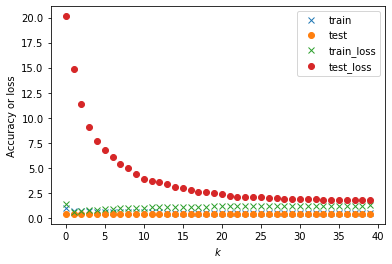

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test  = []

train_losses = []
test_losses = []

for i in range(1,41):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
    train_loss = log_loss(y_train,model.predict_proba(X_train_scaled))
    test_loss = log_loss(y_test,model.predict_proba(X_test_scaled))
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");

plt.plot(train_losses,'x',label="train_loss");
plt.plot(test_losses,'o',label="test_loss");

plt.xlabel('$k$'); plt.ylabel('Accuracy or loss')
plt.legend();
print(max(acc_test))

0.429


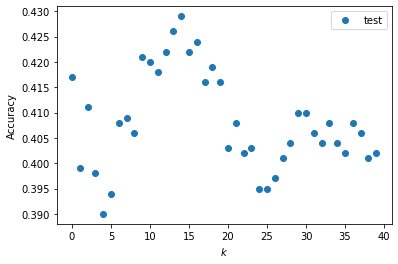

In [102]:
# plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))

0.429


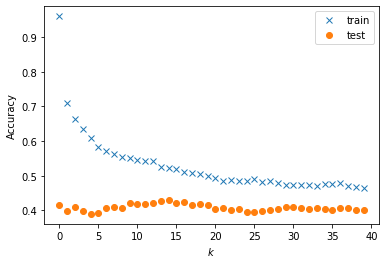

In [103]:
plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))

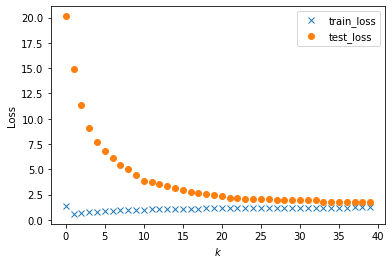

In [58]:
plt.plot(train_losses,'x',label="train_loss");
plt.plot(test_losses,'o',label="test_loss");

plt.xlabel('$k$'); plt.ylabel('Loss')
plt.legend();

In [107]:
parameters = {

    'n_neighbors' : [x for x in range(10,20)]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, scoring = 'accuracy', cv=4, return_train_score = True)
grid_search.fit(X_train_scaled, y_train)
# print(grid_search.cv_results_)
print(grid_search.best_params_)

{'mean_fit_time': array([0.00702739, 0.00600225, 0.00604194, 0.00615036, 0.00607467,
       0.00593531, 0.0066089 , 0.00627387, 0.00597149, 0.00590384]), 'std_fit_time': array([1.61772220e-03, 1.00716312e-04, 2.31745028e-04, 1.27668363e-04,
       2.17742286e-04, 9.73637813e-05, 7.20055398e-04, 1.93006025e-04,
       4.13336187e-05, 9.93851643e-05]), 'mean_score_time': array([0.14151549, 0.13554567, 0.13636112, 0.13924414, 0.14680499,
       0.14302647, 0.14532351, 0.14782321, 0.1485492 , 0.14869297]), 'std_score_time': array([0.016745  , 0.00241265, 0.00276355, 0.00277142, 0.00974726,
       0.00143451, 0.00211809, 0.00388777, 0.00294001, 0.00265318]), 'param_n_neighbors': masked_array(data=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n

In [109]:
model = KNeighborsClassifier(18)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print(accuracy_score(y_pred,y_train))
print(accuracy_score(y_pred_test,y_test))

0.5087543771885943
0.416


## 1.1 Decision tree for max salary (for selected columns)

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

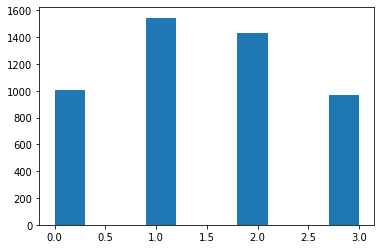

In [84]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.8401515151515152
Testing Accuracy: 0.5303030303030303


In [87]:
print('Bench mark: {}'.format(1545/4950))

Bench mark: 0.31212121212121213


### Tuning max_depth

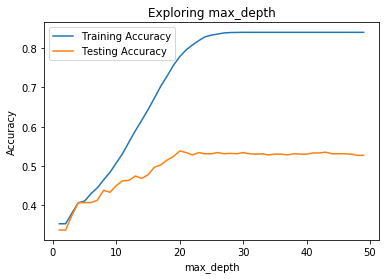

In [88]:
#max_depth
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,50):
    classifier_1 = DecisionTreeClassifier(max_depth = n)
    classifier_1.fit(X_train_scaled, y_train)
    classifier_train_pred_1 = classifier_1.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred_1)) 
    classifier_test_pred_1 = classifier_1.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred_1))

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(range(1,50), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,50), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [89]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.8401515151515152
0.5383838383838384


### Tuning min_samples_leaf

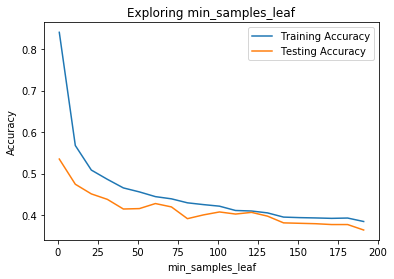

In [90]:
# Tuning min_samples_leaf
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,201,10):
    classifier = DecisionTreeClassifier(min_samples_leaf = n)
    classifier.fit(X_train_scaled, y_train)
    classifier_train_pred = classifier.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(range(1,201,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,201,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [91]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.8401515151515152
0.5353535353535354


### Try Random Forest

0.5454545454545454


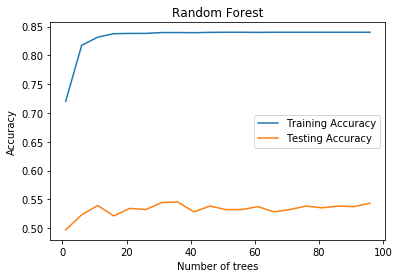

In [92]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier()
estimator_range = range(1, 100, 5)##Number of trees in the forest
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_scaled, y_train)
    train_scores.append(rf.score(X_train_scaled, y_train))
    test_scores.append(rf.score(X_test_scaled, y_test))
    
# print(train_scores)
# print(test_scores)

print(max(test_scores))

plt.title('Random Forest')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(range(1,100,5), train_scores, label = 'Training Accuracy')
plt.plot(range(1,100,5), test_scores, label = 'Testing Accuracy')
plt.legend()

## 1.2 Decision tree for min salary (for selected columns)

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

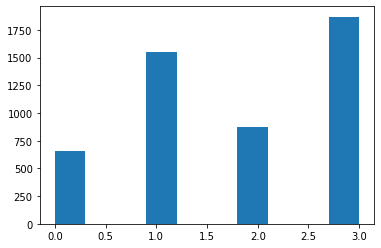

In [93]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.853030303030303
Testing Accuracy: 0.5585858585858586


In [95]:
print('Bench mark: {}'.format(1869/4950))

Bench mark: 0.37757575757575756


### Tuning max_depth

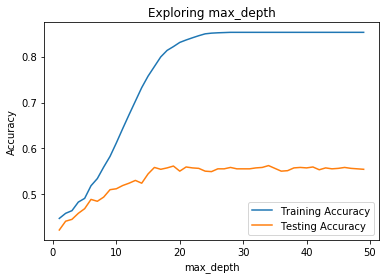

In [96]:
# Tuning max_depth
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,50):
    classifier_1 = DecisionTreeClassifier(max_depth = n)
    classifier_1.fit(X_train_scaled, y_train)
    classifier_train_pred_1 = classifier_1.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred_1)) 
    classifier_test_pred_1 = classifier_1.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred_1))

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(range(1,50), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,50), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [97]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.853030303030303
0.5626262626262626


### Tuning max_depth

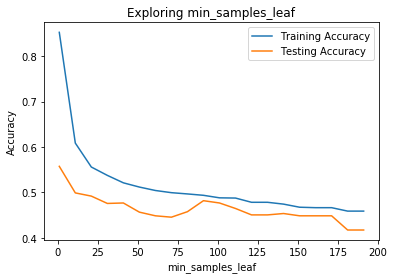

In [98]:
# Tuning min_samples_leaf
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,201,10):
    classifier = DecisionTreeClassifier(min_samples_leaf = n)
    classifier.fit(X_train_scaled, y_train)
    classifier_train_pred = classifier.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(range(1,201,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,201,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [99]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.853030303030303
0.5575757575757576


### Try Random Forest

0.5858585858585859


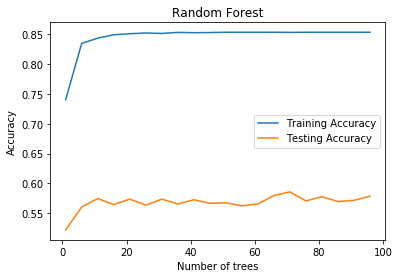

In [100]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier()
estimator_range = range(1, 100, 5)##Number of trees in the forest
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_scaled, y_train)
    train_scores.append(rf.score(X_train_scaled, y_train))
    test_scores.append(rf.score(X_test_scaled, y_test))
    
# print(train_scores)
# print(test_scores)

print(max(test_scores))

plt.title('Random Forest')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(range(1,100,5), train_scores, label = 'Training Accuracy')
plt.plot(range(1,100,5), test_scores, label = 'Testing Accuracy')
plt.legend()

## 2.1 Decision tree for max salary (for all columns)

In [101]:
data = pd.read_csv("formated_data_1111.csv")
data2 = data.drop(['max_sal', 'min_sal', 'city','GDP(billion)', 'Population(thousand)'], axis = 1)
data2

,intern_num,month_num,day,2000,500-2000,50-500,<50,互联网,教育,房产,...,媒体,内容,专员,产品,销售,开发,工程师,助理,运营,GDP per capita
0,176,3,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
1,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
2,44,5,4,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,162518.5736
3,486,4,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,162518.5736
4,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,162518.5736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,73,6,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,169782.5765
4946,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,169782.5765
4947,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765
4948,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765


In [102]:
X = data2
y = data['max_sal']

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

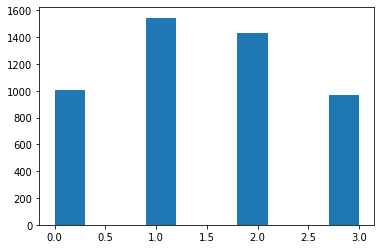

In [103]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [104]:
# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9742424242424242
Testing Accuracy: 0.5040404040404041


In [105]:
print('Bench mark: {}'.format(1545/4950))

Bench mark: 0.31212121212121213


### Tuning max_depth

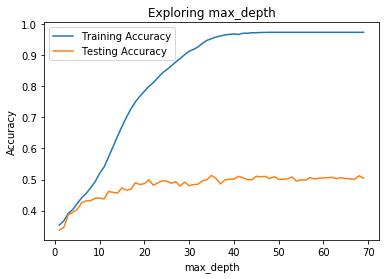

In [106]:
#max_depth
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,70):
    classifier_1 = DecisionTreeClassifier(max_depth = n)
    classifier_1.fit(X_train_scaled, y_train)
    classifier_train_pred_1 = classifier_1.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred_1)) 
    classifier_test_pred_1 = classifier_1.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred_1))

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(range(1,70), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,70), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [107]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.9742424242424242
0.5131313131313131


### Tuning min_samples_leaf

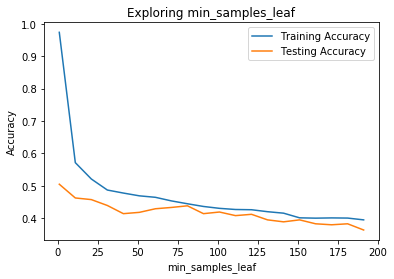

In [108]:
# Tuning min_samples_leaf
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,201,10):
    classifier = DecisionTreeClassifier(min_samples_leaf = n)
    classifier.fit(X_train_scaled, y_train)
    classifier_train_pred = classifier.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(range(1,201,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,201,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [109]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.9742424242424242
0.5050505050505051


### Try Random Forest

0.5232323232323233


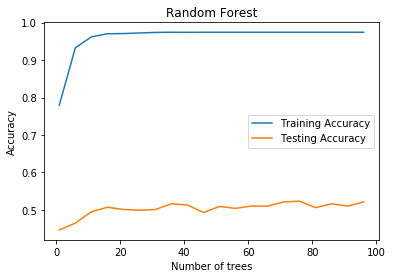

In [110]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier()
estimator_range = range(1, 100, 5)##Number of trees in the forest
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_scaled, y_train)
    train_scores.append(rf.score(X_train_scaled, y_train))
    test_scores.append(rf.score(X_test_scaled, y_test))
    
# print(train_scores)
# print(test_scores)

print(max(test_scores))

plt.title('Random Forest')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(range(1,100,5), train_scores, label = 'Training Accuracy')
plt.plot(range(1,100,5), test_scores, label = 'Testing Accuracy')
plt.legend()

## 2.2 Decision tree for min salary (for all columns)

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

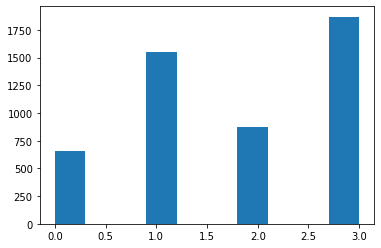

In [111]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9767676767676767
Testing Accuracy: 0.5313131313131313


In [113]:
print('Bench mark: {}'.format(1869/4950))

Bench mark: 0.37757575757575756


### Tuning max_depth

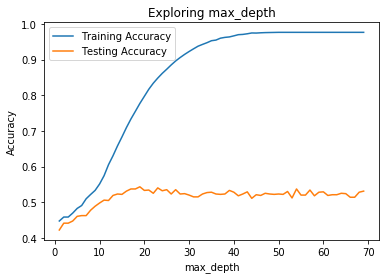

In [114]:
# Tuning max_depth
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,70):
    classifier_1 = DecisionTreeClassifier(max_depth = n)
    classifier_1.fit(X_train_scaled, y_train)
    classifier_train_pred_1 = classifier_1.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred_1)) 
    classifier_test_pred_1 = classifier_1.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred_1))

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.plot(range(1,70), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,70), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

### Tuning min_samples_leaf

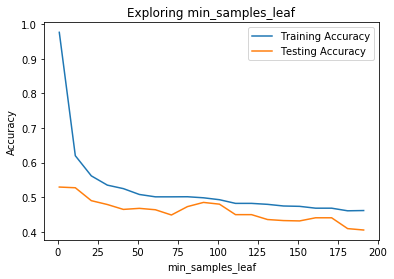

In [115]:
# Tuning min_samples_leaf
train_accuracy_history = []
test_accuracy_history = []
for n in range(1,201,10):
    classifier = DecisionTreeClassifier(min_samples_leaf = n)
    classifier.fit(X_train_scaled, y_train)
    classifier_train_pred = classifier.predict(X_train_scaled)
    train_accuracy_history.append(accuracy_score(y_train, classifier_train_pred)) 
    classifier_test_pred = classifier.predict(X_test_scaled)
    test_accuracy_history.append(accuracy_score(y_test, classifier_test_pred))

plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.plot(range(1,201,10), train_accuracy_history, label = 'Training Accuracy')
plt.plot(range(1,201,10), test_accuracy_history, label = 'Testing Accuracy')
plt.legend()

In [116]:
print(max(train_accuracy_history))
print(max(test_accuracy_history))

0.9767676767676767
0.5292929292929293


## Try Random Forest

0.5656565656565656


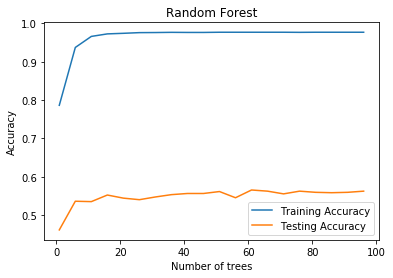

In [117]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier()
estimator_range = range(1, 100, 5)##Number of trees in the forest
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_scaled, y_train)
    train_scores.append(rf.score(X_train_scaled, y_train))
    test_scores.append(rf.score(X_test_scaled, y_test))
    
# print(train_scores)
# print(test_scores)

print(max(test_scores))

plt.title('Random Forest')
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.plot(range(1,100,5), train_scores, label = 'Training Accuracy')
plt.plot(range(1,100,5), test_scores, label = 'Testing Accuracy')
plt.legend()

In [118]:
print(max(test_scores))

0.5656565656565656
